In [1]:
import pandas as pd
import seaborn as sns

# Data loading

In [2]:
historic= pd.read_csv('diamonds.csv')

In [3]:
to_predict = pd.read_csv('rick_diamonds.csv')

# EDA

In [4]:
historic.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [5]:
historic.select_dtypes(include='number').corr()['price']

carat    0.922186
depth   -0.012037
table    0.127832
price    1.000000
x        0.885019
y        0.864059
z        0.860247
Name: price, dtype: float64

C:\Users\raian\miniconda3\envs\2024\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


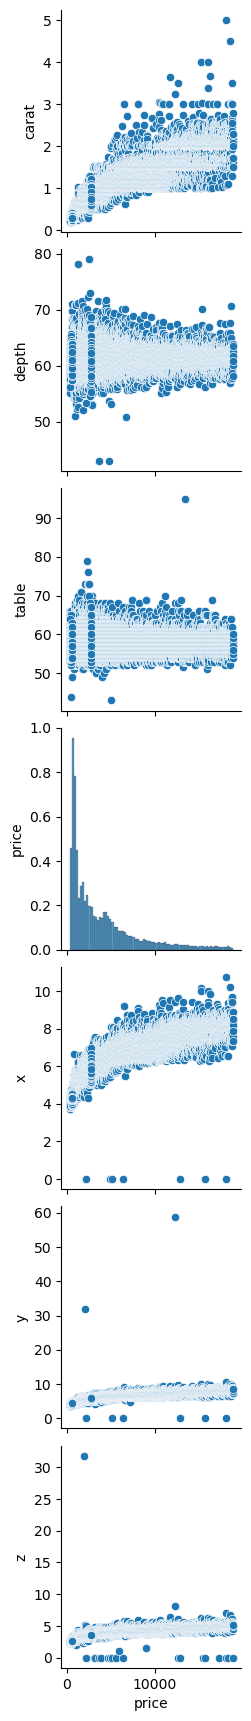

In [6]:
sns.pairplot(historic,x_vars='price')

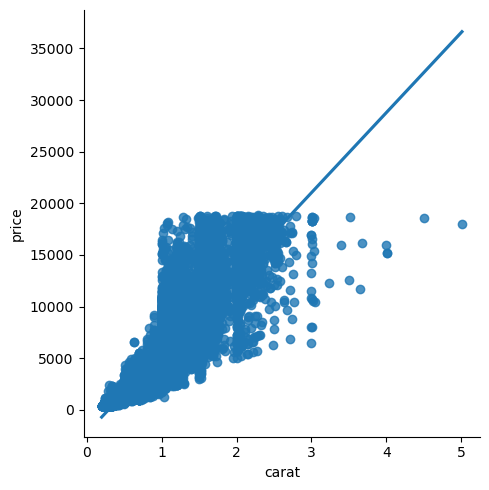

In [7]:
sns.lmplot(data=historic,x='carat',y='price')

In [8]:
import numpy as np
import matplotlib.pyplot as plt


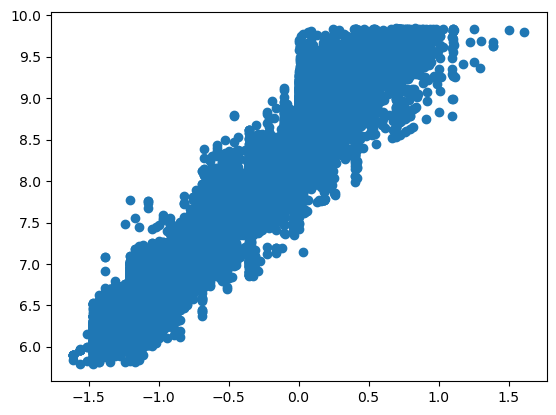

In [9]:
plt.scatter( x=np.log(historic['carat']),y=np.log(historic['price']))

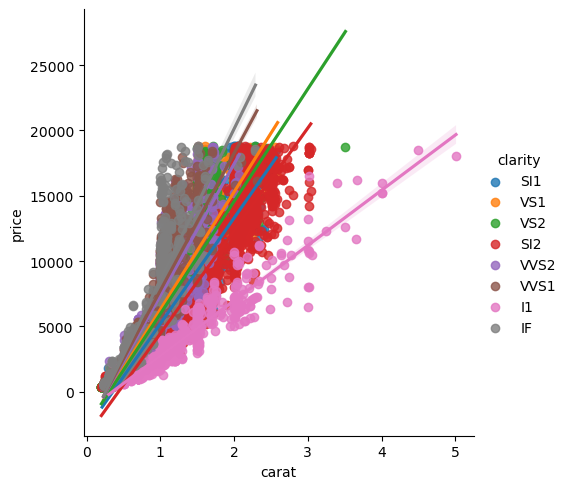

In [10]:
sns.lmplot(data=historic,x='carat',y='price',hue='clarity')

In [11]:
len(historic[historic['carat']>3])/len(historic)

0.0005721291377196567

In [12]:
len(to_predict[to_predict['carat']>3])/len(to_predict)

0.0008

In [13]:
historic.duplicated().sum()

120

# Data preparation

## treat outlier on x,y,z

## Treat the zeros on x,y,z

## Duplicated removal

In [14]:
historic = historic.drop_duplicates()

## Categorical treatment

In [15]:
historic[['color','cut','clarity']]

,color,cut,clarity
0,E,Premium,SI1
1,E,Good,VS1
2,I,Premium,VS2
3,J,Good,SI2
4,J,Very Good,VVS2
...,...,...,...
48935,D,Premium,SI1
48936,D,Ideal,SI1
48937,D,Good,SI1
48938,D,Very Good,SI1


In [16]:
dict_color = {'J':1,'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}
historic['color_num']= historic['color'].replace(dict_color)

C:\Users\raian\AppData\Local\Temp\ipykernel_21116\3121259256.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic['color_num']= historic['color'].replace(dict_color)


In [17]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Fair','Good','Very Good','Premium','Ideal'],['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']])
historic[['cut_num','clarity_num']]=encoder.fit_transform(historic[['cut','clarity']])

C:\Users\raian\AppData\Local\Temp\ipykernel_21116\3770571393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic[['cut_num','clarity_num']]=encoder.fit_transform(historic[['cut','clarity']])
C:\Users\raian\AppData\Local\Temp\ipykernel_21116\3770571393.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  historic[['cut_num','clarity_num']]=encoder.fit_transform(historic[['cut','clarity']])


In [18]:
to_predict['color_num']= to_predict['color'].replace(dict_color)
to_predict[['cut_num','clarity_num']]=encoder.transform(to_predict[['cut','clarity']])

## remove outliers

In [19]:
historic_no_outliers = historic[historic['carat']<3]

## separate x and y

In [25]:
X = historic[['carat','color_num','cut_num','clarity_num']]
y= historic['price']

In [26]:
X_pred = to_predict[['carat','color_num','cut_num','clarity_num']]

## Log transformation

In [29]:
#X.loc[:,'carat'] = np.log(X['carat']+1)
#X.loc[:,'color_num'] = np.log(X['color_num']+1)
#X.loc[:,'cut_num'] = np.log(X['cut_num']+1)
#X.loc[:,'clarity_num'] = np.log(X['clarity_num']+1)

In [30]:
#X_pred.loc[:,'carat'] = np.log(X_pred['carat']+1)
#X_pred.loc[:,'color_num'] = np.log(X_pred['color_num']+1)
#X_pred.loc[:,'cut_num'] = np.log(X_pred['cut_num']+1)
#X_pred.loc[:,'clarity_num'] = np.log(X_pred['clarity_num']+1)

In [31]:
#y = np.log(y)

## Standardization the features

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(X)
#X.loc[:,['carat_log','color_num','cut_num','clarity_num']]= scaler.transform(X)
#X_pred.loc[:,['carat_log','color_num','cut_num','clarity_num']] = scaler.transform(X_pred)

# Modeling

## Linear regression

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
lr1 = LinearRegression()

In [34]:
lr1.fit(X,y)

LinearRegression()

In [35]:
to_predict['price_predicted'] = np.exp(lr1.predict(X_pred))

In [36]:
to_predict.to_csv('prediction.csv',index=False)

In [46]:
lr1.coef_

array([7.16234991, 0.9839079 , 0.0892085 , 0.46563663])

In [47]:
lr1.intercept_

3.0412524533907463

## Knn

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(100)
knn.fit(X,y)
to_predict['price_predicted'] = np.exp(knn.predict(X_pred))
to_predict.to_csv('prediction.csv',index=False)

## Linear regression with multiple models

In [42]:
mask = X['clarity_num']==X['clarity_num'].min()
model_clar_0 = LinearRegression()
model_clar_0.fit(X.loc[mask],y[mask])
model_clar_not_0 = LinearRegression()
model_clar_not_0.fit(X.loc[~mask],y[~mask])

LinearRegression()

In [43]:
mask_predict = X_pred['clarity_num']==X['clarity_num'].min()
to_predict.loc[mask_predict,'price_predicted'] =  np.exp(model_clar_0.predict(X_pred.loc[mask_predict]))
to_predict.loc[~mask_predict,'price_predicted'] =   np.exp(model_clar_not_0.predict(X_pred.loc[~mask_predict]))

In [44]:
to_predict.to_csv('prediction.csv',index=False)

## KNN with multiple models

In [ ]:
mask = X['clarity_num']==X['clarity_num'].min()
model_clar_0 = KNeighborsRegressor(100)
model_clar_0.fit(X.loc[mask],y[mask])
model_clar_not_0 = KNeighborsRegressor(100)
model_clar_not_0.fit(X.loc[~mask],y[~mask])

In [ ]:
mask_predict = X_pred['clarity_num']==X['clarity_num'].min()
to_predict.loc[mask_predict,'price_predicted'] =   model_clar_0.predict(X_pred.loc[mask_predict])
to_predict.loc[~mask_predict,'price_predicted'] =   model_clar_not_0.predict(X_pred.loc[~mask_predict])

In [ ]:
to_predict.to_csv('prediction.csv',index=False)

# Results were checked on https://rairocha-diamonds-diamonds-elm3om.streamlit.app/
- Simple linear regression with carat 1605.1517570736198
- Multiple linear regression with carat,x,y,z 1586.8582546613563
- Multiple linear regression with carat,x,y,z without outliers 1593.1907751918168
- Multiple linear regression with carat,x,y,z,color,cut,clarity 1288.1165852195234
- Multiple linear regression with carat,color,cut,clarity 1294.298533810204
- Multiple linear regression with carat,color,cut,clarity no duplicates 1294.4037604521557
- Multiple linear regression with carat,color,cut,clarity with diferent models per clarity 1173.5608460160684




- Knn 100 neighbors with carat,x,y,z  1391.4176746362411
- Knn 100 neighbors with carat,x,y,z without outliers 1392.3552691121615
- **Knn 100 neighbors with carat,x,y,z,color,cut,clarity 790.1125861303723**
- Knn 100 neighbors with carat,color,cut,clarity 1660.6055901583238
- **Knn 100 neighbors with carat,color,cut,clarity 783.4982805920508**
- **Knn 100 neighbors with carat,color,cut,clarity no duplicates 783.8042383574486**
- **Knn 100 neighbors with carat,color,cut,clarity no duplicates 758.2442946377178**

NameError: name 'df' is not defined

crystak <br>- pamoir <br>- pasdios